#### Load Dataset

In [174]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Inspection

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handle Missing Values

In [178]:
# Filling age with median 
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filling Cabin with Unknown 
df['Cabin'] = df['Cabin'].fillna("Unknown")

# Filling Embarked with Mode 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

#### Convert Data Types

In [179]:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype("category")

In [ ]:
df['Cabin'].head(30)

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

#### Group-based Insights

In [180]:
print("Total Distribution of Gender: ", df['Sex'].value_counts())

Total Distribution of Gender:  Sex
male      577
female    314
Name: count, dtype: int64


In [181]:
# Survival Rate by Gender 
df.groupby('Sex', observed=False).agg({'Survived': 'mean'})


,Survived
Sex,
female,0.742038
male,0.188908


In [182]:
# Survival Rate by passenger class 
df.groupby('Pclass', observed=False).agg({'Survived': 'mean'}).reset_index().rename(columns={'Pclass':'Passenger Class', 'Survived': 'Survival Rate'})

,Passenger Class,Survival Rate
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [183]:
# Survival Rate by Gender and passenger class 
df.groupby(['Sex', 'Pclass'], observed=True).agg({'Survived':'mean'}).reset_index().rename(columns={'Sex': 'Gender', 'Pclass':'Passenger Class', 'Survived': 'Survival Rate'}).round(2)

,Gender,Passenger Class,Survival Rate
0,female,1,0.97
1,female,2,0.92
2,female,3,0.50
3,male,1,0.37
4,male,2,0.16
5,male,3,0.14


#### Visualization

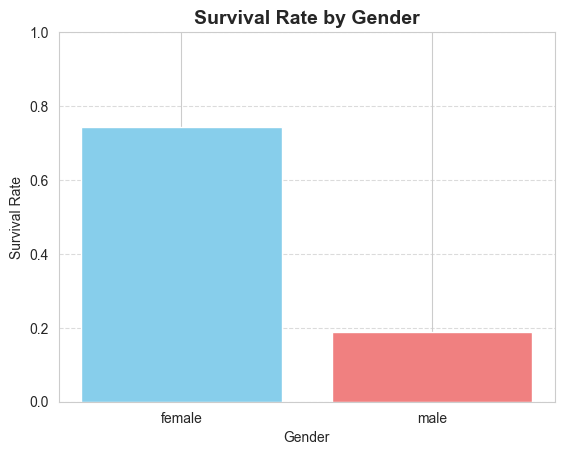

In [184]:
import matplotlib.pyplot as plt

data = df.groupby('Sex', observed=False)['Survived'].mean()

plt.Figure(figsize=(8, 6))
plt.title("Survival Rate by Gender", fontsize=14, weight="bold")
plt.bar(data.index, data.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

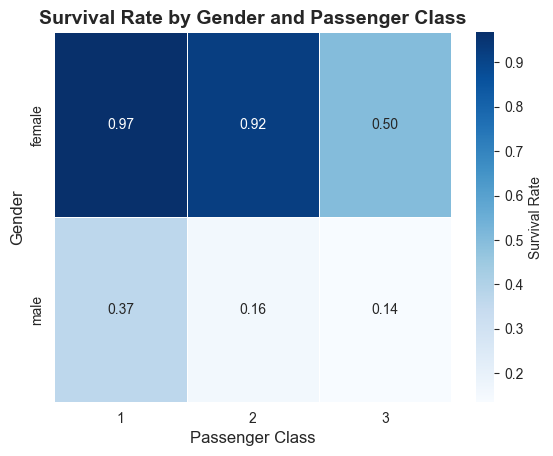

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot = df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean', observed=False)

plt.Figure(figsize=(8, 5))
plt.title("Survival Rate by Gender and Passenger Class", fontsize=14, weight="bold")
sns.heatmap(data=pivot, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Survival Rate'})
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.show()